# **Kaggle HW5: TEAM DONUT SHOP**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [1]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [2]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [3]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

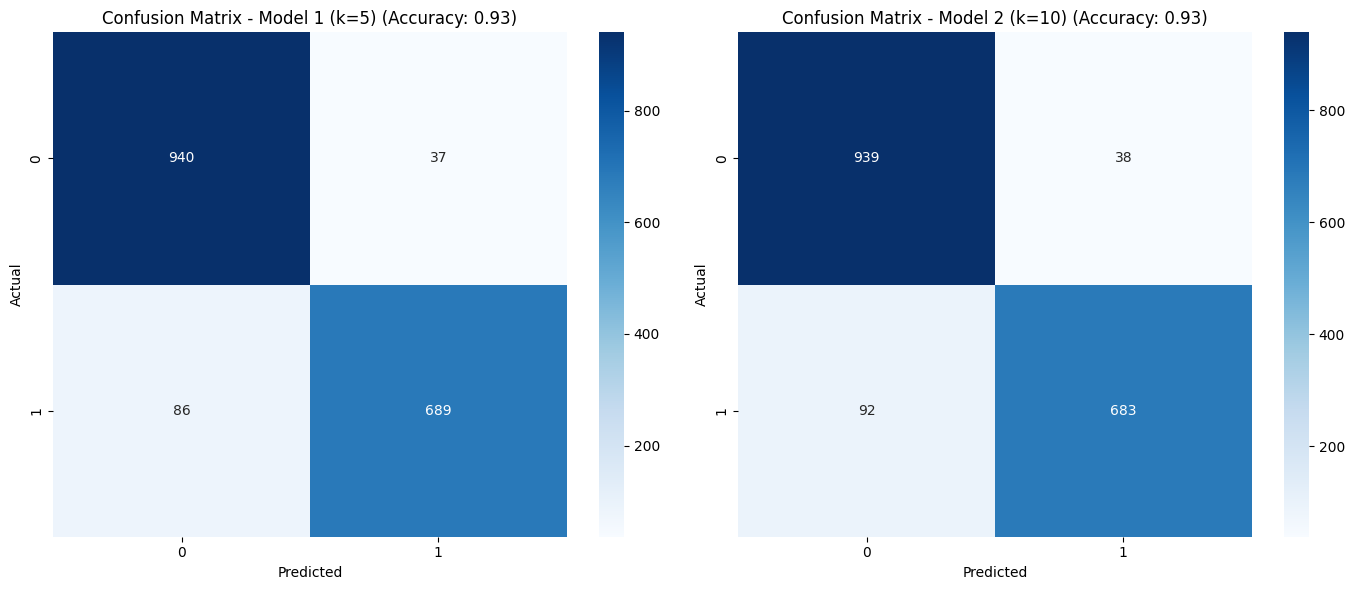

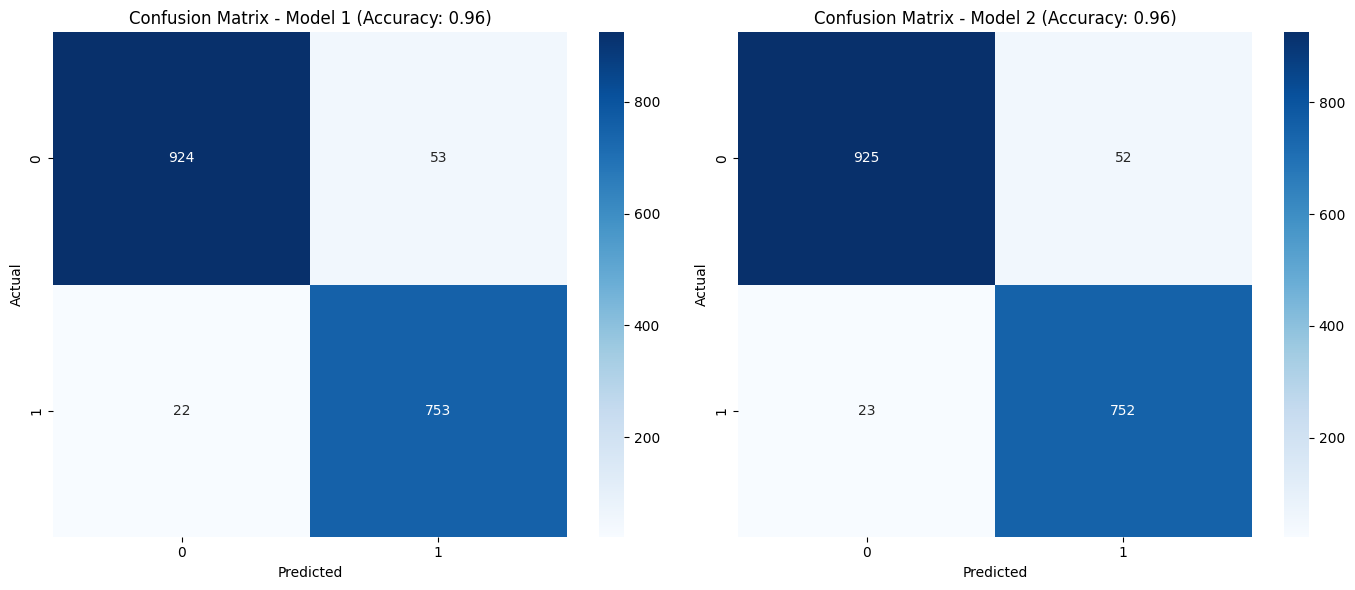

,Feature,Importance
0,registered,-1.033380
1,viewed,1.096036
2,explored,3.943799
3,nforum_posts,0.290856
4,course_id_HarvardX/CS50x/2012,-1.522836
...,...,...
13598,nchapters_31.0,0.662997
13599,nchapters_32.0,0.388946
13600,nchapters_33.0,0.788111
13601,nchapters_34.0,0.337143


In [46]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


df_train = pd.read_csv('edx_train.csv')
df_test = pd.read_csv('edx_test.csv')


# This fills missing values for categorical data
df_train.fillna('unk', inplace=True)
df_test.fillna('unk', inplace=True)
userid_DI_test = df_test['userid_DI']

target = "certified"
X = df_train.drop(target, axis=1)
y = df_train[target]


# This fills in unknowns with the median for df_train and df_test
numerical_columns = X.select_dtypes(include=np.number).columns
for col in numerical_columns:
    median_value = X[X[col] != -1][col].median()
    X[col] = X[col].replace(-1, median_value)
for col in numerical_columns:
    median_value = df_test[df_test[col] != -1][col].median()
    df_test[col] = df_test[col].replace(-1, median_value)

X = pd.get_dummies(X, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

# test set is missing "certified" column. this remedies errors from splitting the data
missing_cols = set(X.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0

df_test = df_test[X.columns]
X = pd.concat([X], axis=1, copy=False)
df_test = pd.concat([df_test], axis=1, copy=False)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# K-NN modeling
kNN_model_1 = KNeighborsClassifier(n_neighbors=5)
kNN_model_2 = KNeighborsClassifier(n_neighbors=10)

kNN_model_1.fit(X_train, y_train)
kNN_model_2.fit(X_train, y_train)

kNN_y_pred_1 = kNN_model_1.predict(X_val)
kNN_y_pred_2 = kNN_model_2.predict(X_val)

kNN_acc_1 = accuracy_score(y_val, kNN_y_pred_1)
kNN_acc_2 = accuracy_score(y_val, kNN_y_pred_2)

kNN_conf_matrix_1 = confusion_matrix(y_val, kNN_y_pred_1)
kNN_conf_matrix_2 = confusion_matrix(y_val, kNN_y_pred_2)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(kNN_conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Model 1 (k=5) (Accuracy: {kNN_acc_1:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(kNN_conf_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Model 2 (k=10) (Accuracy: {kNN_acc_2:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Predicting on test data
kNN_test_predictions_1 = kNN_model_1.predict(df_test)
kNN_test_predictions_2 = kNN_model_2.predict(df_test)


# Logistic Regression modeling
LR_model_1 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
LR_model_2 = LogisticRegression(solver='liblinear', C=0.5, random_state=42)
LR_model_1.fit(X_train, y_train)
LR_model_2.fit(X_train, y_train)

LR_y_pred_1 = LR_model_1.predict(X_val)
LR_y_pred_2 = LR_model_2.predict(X_val)

LR_acc_1 = accuracy_score(y_val, LR_y_pred_1)
LR_acc_2 = accuracy_score(y_val, LR_y_pred_2)

LR_conf_matrix_1 = confusion_matrix(y_val, LR_y_pred_1)
LR_conf_matrix_2 = confusion_matrix(y_val, LR_y_pred_2)

# Plotting confusion matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(LR_conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Model 1 (Accuracy: {LR_acc_1:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(LR_conf_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Model 2 (Accuracy: {LR_acc_2:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Predicting on test data
LR_test_predictions_1 = LR_model_1.predict(df_test)
LR_test_predictions_2 = LR_model_2.predict(df_test)

#Save predictions as CSV
submission = pd.DataFrame({'userid_DI': userid_DI_test,
                           'predictions_model_2': LR_test_predictions_2})
submission.to_csv('submission.csv', index=False)


**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I used the Logistic Regression and k-NN models. In the Logistic Regression models, I mainly only tuned the inverse regularization strength from 1.0 to 0.5. This did not make a big difference. For k-NN model, I tuned the n_neighbors parameter from 5 to 10 and also found little to no differences. I wasn't entirely sure what else to tune for hyperparameters and did not mess around too much as I was happy with the accuracy of the models.

Looking at the confusion matrix, I see that both LR models have high accuracy, precision, and recall. However, the k-NN models are lower in these statistics.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

I used all features in the model and filled in the NaN, unk, and -1 values with medians.

Specific features that seemed important were if they were registered, they viewed, explored, and the number of forum posts. These had the highest magnitude of weights in the regression.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

Because the goal is to maximize profits, they will likely target those that can complete their paid certificate program. This also means that those that are most likely able to complete the program are likely those that have better education/background with their programs. Essentially features that would be weighted heavily towards certificate completion. This would be seemingly unethical because it would lower the outreach towards those that are not as qualified. This could downwards spiral for those that are not as qualified as it would lower their priority. This could lead future participants (maybe parents) to also have less background for the certification, and thus push their children even lower in priority. It is similar to a rich get richer situation where highly educated individuals that have a higher probability of completing the certification will likely be marketed heavily for this certification.
